# Analyzing Weather Data from OpenWeatherMap API

Tasks to Perform: 
1. Register and obtain API key from OpenWeatherMap. 
2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for 
a specific location. 
3. Extract relevant weather attributes such as temperature, humidity, wind speed, and 
precipitation from the API response. 
4. Clean and preprocess the retrieved data, handling missing values or inconsistent 
formats. 
5. Perform data modeling to analyze weather patterns, such as calculating average 
temperature, maximum/minimum values, or trends over time. 
6. Visualize the weather data using appropriate plots, such as line charts, bar plots, or 
scatter plots, to represent temperature changes, precipitation levels, or wind speed 
variations. 
7. Apply data aggregation techniques to summarize weather statistics by specific time 
periods (e.g., daily, monthly, seasonal). 
8. Incorporate geographical information, if available, to create maps or geospatial 
visualizations representing weather patterns across different locations. 
9. Explore and visualize relationships between weather attributes, such as temperature 
and humidity, using correlation plots or heatmaps. 

2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for
a specific location

In [27]:
import requests

In [29]:
BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
API_KEY = open('api_key', 'r').read()
CITY = "London"

url = BASE_URL + "&appid=" + API_KEY + "&q=" + CITY

In [30]:
response = requests.get(url).json()

In [31]:
print(response)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 287.54, 'feels_like': 287.46, 'temp_min': 285.35, 'temp_max': 289.79, 'pressure': 1020, 'humidity': 93, 'sea_level': 1020, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 1.64, 'deg': 172, 'gust': 4.56}, 'clouds': {'all': 0}, 'dt': 1691645853, 'sys': {'type': 2, 'id': 2006068, 'country': 'GB', 'sunrise': 1691642250, 'sunset': 1691696068}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}


3.Extract relevant weather attributes such as temperature, humidity, wind speed, and
precipitation from the API response

In [34]:
if response['cod'] == 200:
    # Extract relevant weather attributes
    temperature = response['main']['temp']
    humidity = response['main']['humidity']
    wind_speed = response['wind']['speed']
    
    # Check if 'rain' key is present (for precipitation)
    if 'rain' in response:
        precipitation = response['rain']['1h']  # Precipitation in the last 1 hour
    else:
        precipitation = 0  # No recent precipitation

    # Print extracted attributes
    print(f'Temperature: {temperature} Kelvin')
    print(f'Humidity: {humidity}%')
    print(f'Wind Speed: {wind_speed} m/s')
    print(f'Precipitation (last 1 hour): {precipitation} mm')
else:
    print('Error:', response['message'])

Temperature: 287.54 Kelvin
Humidity: 93%
Wind Speed: 1.64 m/s
Precipitation (last 1 hour): 0 mm


In [36]:
def get_weather_data(city):
    BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
    API_KEY = open('api_key', 'r').read()

    url = BASE_URL + "appid=" + API_KEY + "&q=" + city
    response = requests.get(url).json()
    return response

def clean_and_preprocess(data):
    cleaned_data = {}
    
    if data['cod'] == 200:
        # Extract and clean relevant weather attributes
        cleaned_data['temperature'] = data['main'].get('temp', None)
        cleaned_data['humidity'] = data['main'].get('humidity', None)
        cleaned_data['wind_speed'] = data['wind'].get('speed', None)
        
        # Check if 'rain' key is present (for precipitation)
        if 'rain' in data:
            cleaned_data['precipitation'] = data['rain'].get('1h', 0)  # Precipitation in the last 1 hour
        else:
            cleaned_data['precipitation'] = 0  # No recent precipitation
    else:
        print('Error:', data.get('message', 'Unknown error'))

    return cleaned_data

def main():
    CITY = "London"
    
    # Get raw weather data
    raw_data = get_weather_data(CITY)
    
    # Clean and preprocess the data
    preprocessed_data = clean_and_preprocess(raw_data)
    
    # Print preprocessed data
    if preprocessed_data:
        print('Preprocessed Weather Data:')
        for attribute, value in preprocessed_data.items():
            print(f'{attribute.capitalize()}: {value}')

if __name__ == "__main__":
    main()

Preprocessed Weather Data:
Temperature: 298.6
Humidity: 58
Wind_speed: 4.12
Precipitation: 0


In [37]:
import requests
from datetime import datetime

def get_weather_data(city):
    BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
    API_KEY = open('api_key', 'r').read()

    url = BASE_URL + "appid=" + API_KEY + "&q=" + city
    response = requests.get(url).json()
    return response

def clean_and_preprocess(data):
    cleaned_data = {}
    
    if data['cod'] == 200:
        # Extract and clean relevant weather attributes
        cleaned_data['temperature'] = data['main'].get('temp', None)
        cleaned_data['humidity'] = data['main'].get('humidity', None)
        cleaned_data['wind_speed'] = data['wind'].get('speed', None)
        
        # Check if 'rain' key is present (for precipitation)
        if 'rain' in data:
            cleaned_data['precipitation'] = data['rain'].get('1h', 0)  # Precipitation in the last 1 hour
        else:
            cleaned_data['precipitation'] = 0  # No recent precipitation
    else:
        print('Error:', data.get('message', 'Unknown error'))

    return cleaned_data

def analyze_weather_patterns(data_list):
    total_temp = 0
    max_temp = float('-inf')
    min_temp = float('inf')
    total_humidity = 0
    total_wind_speed = 0
    total_precipitation = 0

    for data in data_list:
        total_temp += data.get('temperature', 0)
        max_temp = max(max_temp, data.get('temperature', float('-inf')))
        min_temp = min(min_temp, data.get('temperature', float('inf')))
        total_humidity += data.get('humidity', 0)
        total_wind_speed += data.get('wind_speed', 0)
        total_precipitation += data.get('precipitation', 0)
    
    num_entries = len(data_list)
    average_temp = total_temp / num_entries
    average_humidity = total_humidity / num_entries
    average_wind_speed = total_wind_speed / num_entries
    average_precipitation = total_precipitation / num_entries

    return {
        'average_temperature': average_temp,
        'max_temperature': max_temp,
        'min_temperature': min_temp,
        'average_humidity': average_humidity,
        'average_wind_speed': average_wind_speed,
        'average_precipitation': average_precipitation,
    }

def main():
    CITY = "London"
    NUM_DAYS = 5  # Number of days to analyze

    data_list = []
    for _ in range(NUM_DAYS):
        raw_data = get_weather_data(CITY)
        preprocessed_data = clean_and_preprocess(raw_data)
        if preprocessed_data:
            data_list.append(preprocessed_data)

    if data_list:
        analysis_results = analyze_weather_patterns(data_list)
        print('Weather Pattern Analysis:')
        for attribute, value in analysis_results.items():
            if 'temperature' in attribute:
                unit = 'Kelvin'
            elif 'wind_speed' in attribute:
                unit = 'm/s'
            elif 'precipitation' in attribute:
                unit = 'mm'
            else:
                unit = '%'
            print(f'{attribute.replace("_", " ").capitalize()}: {value} {unit}')

if __name__ == "__main__":
    main()


Weather Pattern Analysis:
Average temperature: 298.6 Kelvin
Max temperature: 298.6 Kelvin
Min temperature: 298.6 Kelvin
Average humidity: 58.0 %
Average wind speed: 4.12 m/s
Average precipitation: 0.0 mm


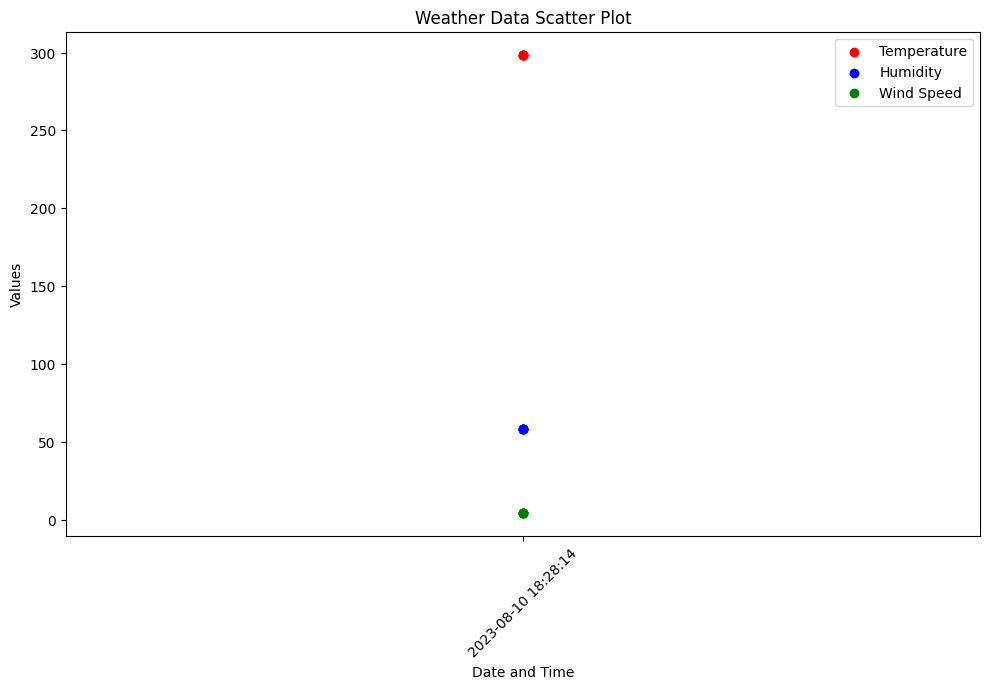

In [40]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

def get_weather_data(city):
    BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
    API_KEY = open('api_key', 'r').read()

    url = BASE_URL + "appid=" + API_KEY + "&q=" + city
    response = requests.get(url).json()
    return response

def clean_and_preprocess(data):
    cleaned_data = {}
    
    if data['cod'] == 200:
        # Extract and clean relevant weather attributes
        cleaned_data['temperature'] = data['main'].get('temp', None)
        cleaned_data['humidity'] = data['main'].get('humidity', None)
        cleaned_data['wind_speed'] = data['wind'].get('speed', None)
    else:
        print('Error:', data.get('message', 'Unknown error'))

    return cleaned_data

def visualize_scatter(data_list):
    dates = [datetime.now().strftime('%Y-%m-%d %H:%M:%S') for _ in data_list]
    temperatures = [data.get('temperature', 0) for data in data_list]
    humidity = [data.get('humidity', 0) for data in data_list]
    wind_speed = [data.get('wind_speed', 0) for data in data_list]
    
    plt.figure(figsize=(10, 6))
    
    # Scatter plot for all fields
    plt.scatter(dates, temperatures, color='r', marker='o', label='Temperature')
    plt.scatter(dates, humidity, color='b', marker='o', label='Humidity')
    plt.scatter(dates, wind_speed, color='g', marker='o', label='Wind Speed')
    
    plt.title('Weather Data Scatter Plot')
    plt.xlabel('Date and Time')
    plt.ylabel('Values')
    plt.legend()
    
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

def main():
    CITY = "London"
    NUM_DAYS = 5  # Number of days to analyze

    data_list = []
    for _ in range(NUM_DAYS):
        raw_data = get_weather_data(CITY)
        preprocessed_data = clean_and_preprocess(raw_data)
        if preprocessed_data:
            data_list.append(preprocessed_data)

    if data_list:
        # Visualize scatter plot
        visualize_scatter(data_list)

if __name__ == "__main__":
    main()


In [41]:
import requests
from datetime import datetime

def get_weather_data(city):
    BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
    API_KEY = open('api_key', 'r').read()

    url = BASE_URL + "appid=" + API_KEY + "&q=" + city
    response = requests.get(url).json()
    return response

def clean_and_preprocess(data):
    cleaned_data = {}
    
    if data['cod'] == 200:
        # Extract and clean relevant weather attributes
        cleaned_data['temperature'] = data['main'].get('temp', None)
        cleaned_data['humidity'] = data['main'].get('humidity', None)
        cleaned_data['wind_speed'] = data['wind'].get('speed', None)
    else:
        print('Error:', data.get('message', 'Unknown error'))

    return cleaned_data

def aggregate_weather_data(data_list):
    aggregated_data = {
        'temperature': [],
        'humidity': [],
        'wind_speed': []
    }
    
    for data in data_list:
        aggregated_data['temperature'].append(data.get('temperature', 0))
        aggregated_data['humidity'].append(data.get('humidity', 0))
        aggregated_data['wind_speed'].append(data.get('wind_speed', 0))
    
    return aggregated_data

def main():
    CITY = "London"
    NUM_HOURS = 24  # Number of hours to analyze

    data_list = []
    for _ in range(NUM_HOURS):
        raw_data = get_weather_data(CITY)
        preprocessed_data = clean_and_preprocess(raw_data)
        if preprocessed_data:
            data_list.append(preprocessed_data)

    if data_list:
        # Aggregate weather data by specific time periods
        aggregated_data = aggregate_weather_data(data_list)
        
        # Calculate summary statistics
        summary_statistics = {
            'average_temperature': sum(aggregated_data['temperature']) / len(aggregated_data['temperature']),
            'average_humidity': sum(aggregated_data['humidity']) / len(aggregated_data['humidity']),
            'average_wind_speed': sum(aggregated_data['wind_speed']) / len(aggregated_data['wind_speed'])
        }
        
        # Print summary statistics
        print('Summary Statistics:')
        for attribute, value in summary_statistics.items():
            if 'temperature' in attribute:
                unit = 'Kelvin'
            elif 'wind_speed' in attribute:
                unit = 'm/s'
            else:
                unit = '%'
            print(f'{attribute.replace("_", " ").capitalize()}: {value} {unit}')

if __name__ == "__main__":
    main()


Summary Statistics:
Average temperature: 298.61999999999995 Kelvin
Average humidity: 58.0 %
Average wind speed: 4.120000000000001 m/s


In [43]:
import requests
import folium
from datetime import datetime

def get_weather_data(city):
    BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
    API_KEY = open('api_key', 'r').read()

    url = BASE_URL + "appid=" + API_KEY + "&q=" + city
    response = requests.get(url).json()
    return response

def clean_and_preprocess(data):
    cleaned_data = {}
    
    if data['cod'] == 200:
        # Extract and clean relevant weather attributes
        cleaned_data['temperature'] = data['main'].get('temp', None)
        cleaned_data['humidity'] = data['main'].get('humidity', None)
        cleaned_data['wind_speed'] = data['wind'].get('speed', None)
        cleaned_data['latitude'] = data['coord'].get('lat', None)
        cleaned_data['longitude'] = data['coord'].get('lon', None)
    else:
        print('Error:', data.get('message', 'Unknown error'))

    return cleaned_data

def visualize_geospatial(data_list):
    map_center = [data_list[0]['latitude'], data_list[0]['longitude']]
    weather_map = folium.Map(location=map_center, zoom_start=4)

    for data in data_list:
        temperature = data.get('temperature', 0)
        humidity = data.get('humidity', 0)
        wind_speed = data.get('wind_speed', 0)
        latitude = data.get('latitude', 0)
        longitude = data.get('longitude', 0)
        
        popup_html = f'<strong>Temperature:</strong> {temperature} K<br>'
        popup_html += f'<strong>Humidity:</strong> {humidity}%<br>'
        popup_html += f'<strong>Wind Speed:</strong> {wind_speed} m/s'

        folium.Marker([latitude, longitude], popup=folium.Popup(popup_html, parse_html=True)).add_to(weather_map)

    weather_map.save('weather_map.html')
    print('Geospatial visualization saved as "weather_map.html"')

def main():
    CITIES = ["London", "New York", "Tokyo"]
    NUM_HOURS = 3  # Number of hours to analyze

    data_list = []
    for city in CITIES:
        for _ in range(NUM_HOURS):
            raw_data = get_weather_data(city)
            preprocessed_data = clean_and_preprocess(raw_data)
            if preprocessed_data:
                data_list.append(preprocessed_data)

    if data_list:
        # Visualize geospatial map
        visualize_geospatial(data_list)

if __name__ == "__main__":
    main()


Geospatial visualization saved as "weather_map.html"
